In [ ]:
//@version=6
indicator('VWAP with Buy/Sell Delta VWAP (1-Min Data)', overlay = true)

//vwap logic
// VWAP calculation from 1-minute data
f_vwap_calc() =>
    var float cumPV = 0.0
    var float cumVol = 0.0
    var float cumPV_buy = 0.0
    var float cumVol_buy = 0.0
    var float cumPV_sell = 0.0
    var float cumVol_sell = 0.0

    // Reset on new day
    if bool(ta.change(time('D')))
        cumPV := 0.0
        cumVol := 0.0
        cumPV_buy := 0.0
        cumVol_buy := 0.0
        cumPV_sell := 0.0
        cumVol_sell := 0.0
        cumVol_sell

    buyVol = close > open ? volume : 0.0
    sellVol = close < open ? volume : 0.0

    cumPV := cumPV + close * volume
    cumVol := cumVol + volume

    cumPV_buy := cumPV_buy + close * buyVol
    cumVol_buy := cumVol_buy + buyVol

    cumPV_sell := cumPV_sell + close * sellVol
    cumVol_sell := cumVol_sell + sellVol

    vwap = cumVol != 0 ? cumPV / cumVol : na
    buyVWAP = cumVol_buy != 0 ? cumPV_buy / cumVol_buy : na
    sellVWAP = cumVol_sell != 0 ? cumPV_sell / cumVol_sell : na

    [vwap, buyVWAP, sellVWAP]

// Pull 1-minute VWAP values
[vwap_1m, buyVWAP_1m, sellVWAP_1m] = request.security(syminfo.tickerid, '1', f_vwap_calc())

// Only show on intraday charts
showVWAP = not timeframe.isdaily and not timeframe.isweekly and not timeframe.ismonthly

// Plot VWAPs with conditional display
plot_vwap = plot(showVWAP ? vwap_1m : na, color = color.rgb(255, 153, 0, 100), linewidth = 1, title = 'VWAP (1m)')
plot_buy_vwap = plot(showVWAP ? buyVWAP_1m : na, color = color.rgb(0, 137, 123, 90), linewidth = 1, title = 'Buy Delta VWAP (1m)')
plot_sell_vwap = plot(showVWAP ? sellVWAP_1m : na, color = color.rgb(255, 82, 82, 90), linewidth = 1, title = 'Sell Delta VWAP (1m)')

// Fill areas
fill(plot_vwap, plot_buy_vwap, color = showVWAP ? color.new(color.teal, 85) : na, title = 'Buy VWAP Fill')
fill(plot_vwap, plot_sell_vwap, color = showVWAP ? color.new(color.red, 85) : na, title = 'Sell VWAP Fill')


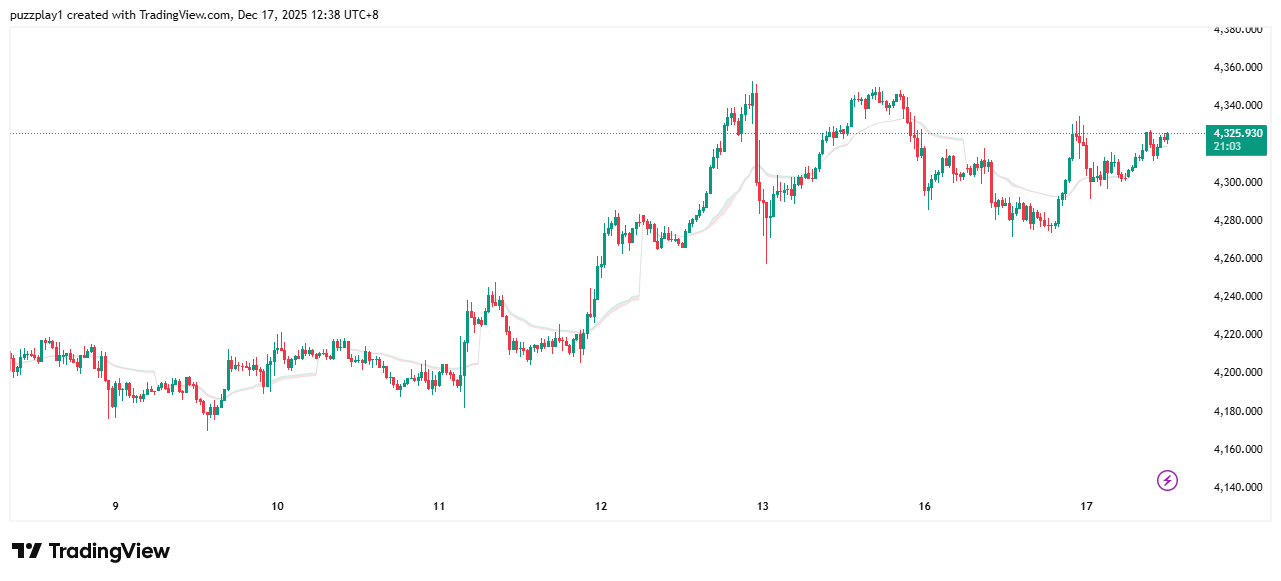